--2025-06-19 15:42:06--  https://cernbox.cern.ch/remote.php/dav/public-files/slWSvR2aRSA7S8Z/SMHiggsToZZTo4L.root
Resolving cernbox.cern.ch (cernbox.cern.ch)... 128.142.170.17, 128.142.53.35, 128.142.53.28, ...
Connecting to cernbox.cern.ch (cernbox.cern.ch)|128.142.170.17|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 42400229 (40M) [application/octet-stream]
Saving to: 'SMHiggsToZZTo4L.root'

SMHiggsToZZTo4L.roo 100%[===================>]  40.44M  14.6MB/s    in 2.8s    

2025-06-19 15:42:10 (14.6 MB/s) - 'SMHiggsToZZTo4L.root' saved [42400229/42400229]



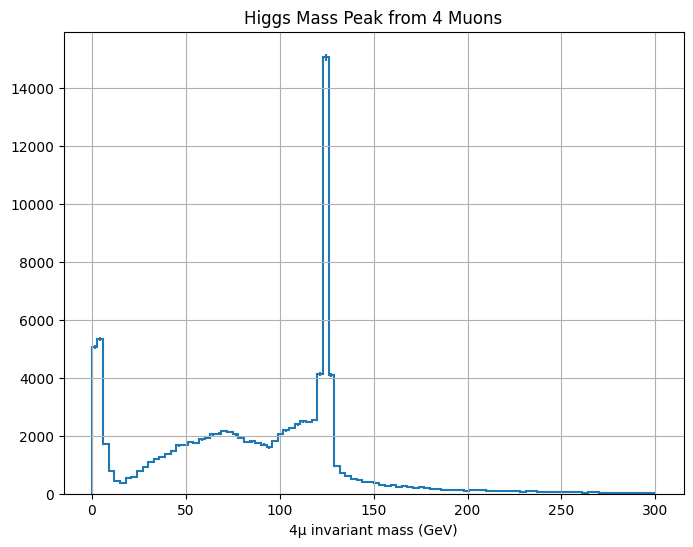

In [2]:
# Setup
import hist, vector
import uproot
import awkward as ak
import matplotlib.pyplot as plt
import numpy as np

vector.register_awkward()

# Download and load the dataset
!wget -O SMHiggsToZZTo4L.root https://cernbox.cern.ch/remote.php/dav/public-files/slWSvR2aRSA7S8Z/SMHiggsToZZTo4L.root

file = uproot.open("SMHiggsToZZTo4L.root")
tree = file["Events"]

# Load data
events_raw = tree.arrays()

# Reformat for convenience
events = ak.zip({
    "PV": ak.zip({
        "x": events_raw["PV_x"],
        "y": events_raw["PV_y"],
        "z": events_raw["PV_z"],
    }, with_name="Vector3D"),
    "muon": ak.zip({
        "pt": events_raw["Muon_pt"],
        "phi": events_raw["Muon_phi"],
        "eta": events_raw["Muon_eta"],
        "mass": events_raw["Muon_mass"],
        "charge": events_raw["Muon_charge"],
        "pfRelIso03": events_raw["Muon_pfRelIso03_all"],
        "pfRelIso04": events_raw["Muon_pfRelIso04_all"],
    }, with_name="Momentum4D"),
    "electron": ak.zip({
        "pt": events_raw["Electron_pt"],
        "phi": events_raw["Electron_phi"],
        "eta": events_raw["Electron_eta"],
        "mass": events_raw["Electron_mass"],
        "charge": events_raw["Electron_charge"],
        "pfRelIso03": events_raw["Electron_pfRelIso03_all"],
    }, with_name="Momentum4D"),
    "MET": ak.zip({
        "pt": events_raw["MET_pt"],
        "phi": events_raw["MET_phi"],
    }, with_name="Momentum2D"),
}, depth_limit=1)

# Pick 4-muon combinations
mu4 = ak.combinations(events.muon, 4, fields=["m1", "m2", "m3", "m4"])

# Sum their 4-momenta
m4_sum = mu4.m1 + mu4.m2 + mu4.m3 + mu4.m4

# Plot their invariant mass
h = hist.Hist.new.Reg(100, 0, 300, name="mass", label="4μ invariant mass (GeV)").Double()
h.fill(ak.ravel(m4_sum.mass))

# Plot
fig, ax = plt.subplots(figsize=(8,6))
h.plot(ax=ax)
ax.set_title("Higgs Mass Peak from 4 Muons")
plt.grid(True)
plt.show()


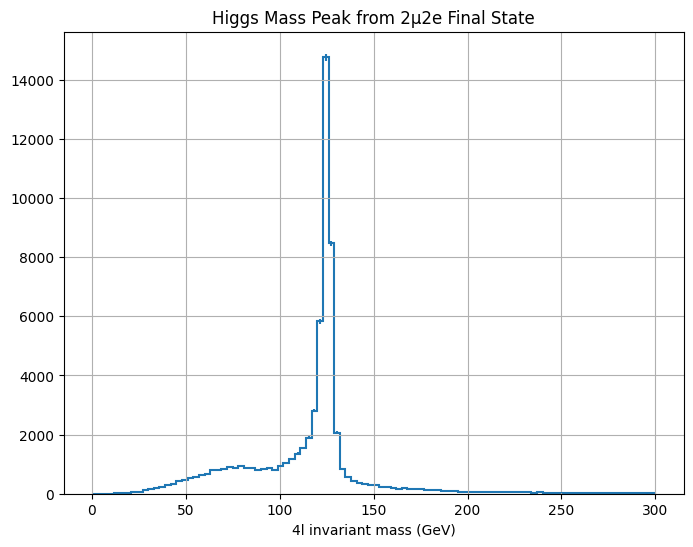

In [4]:
# Create all quadruplets (mu+, mu-, e+, e-)
quadruplets = ak.cartesian((muons_plus, muons_minus, electrons_plus, electrons_minus), nested=True)

# Unpack quadruplets into individual leptons
mu_plus, mu_minus, elec_plus, elec_minus = ak.unzip(quadruplets)

# Sum their four-momenta
higgs_candidates = mu_plus + mu_minus + elec_plus + elec_minus

# Plot invariant mass histogram
higgs_mass_hist = hist.Hist.new.Reg(100, 0, 300, name="mass", label="4l invariant mass (GeV)").Double()
higgs_mass_hist.fill(ak.ravel(higgs_candidates.mass))

fig, ax = plt.subplots(figsize=(8,6))
higgs_mass_hist.plot(ax=ax)
ax.set_title("Higgs Mass Peak from 2μ2e Final State")
plt.grid(True)
plt.show()



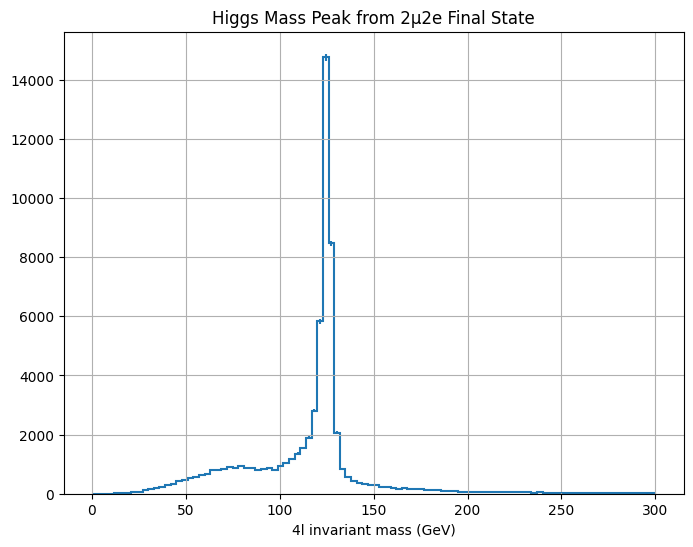

In [5]:
# Create all quadruplets (mu+, mu-, e+, e-)
quadruplets = ak.cartesian((muons_plus, muons_minus, electrons_plus, electrons_minus), nested=True)

# Unpack quadruplets into individual leptons
mu_plus, mu_minus, elec_plus, elec_minus = ak.unzip(quadruplets)

# Sum their four-momenta
higgs_candidates = mu_plus + mu_minus + elec_plus + elec_minus

# Plot invariant mass histogram
higgs_mass_hist = hist.Hist.new.Reg(100, 0, 300, name="mass", label="4l invariant mass (GeV)").Double()
higgs_mass_hist.fill(ak.ravel(higgs_candidates.mass))

fig, ax = plt.subplots(figsize=(8,6))
higgs_mass_hist.plot(ax=ax)
ax.set_title("Higgs Mass Peak from 2μ2e Final State")
plt.grid(True)
plt.show()


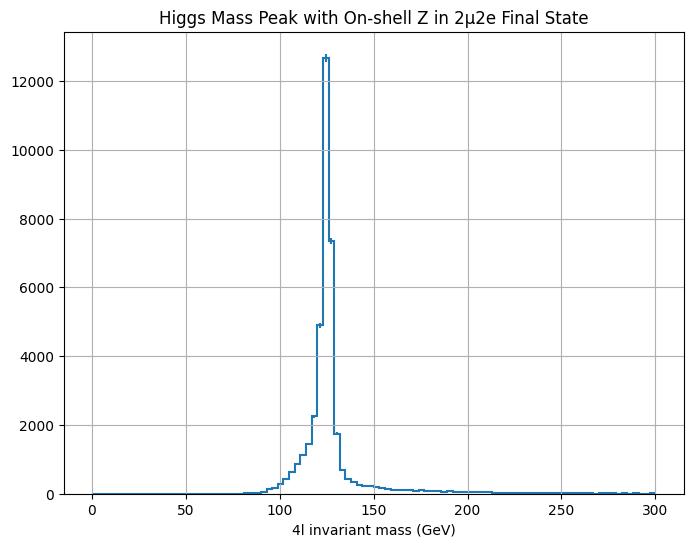

In [6]:
import awkward as ak
import hist
import matplotlib.pyplot as plt

# Hardcoded Z boson mass in GeV
ZMASS = 91.1876

# Create all quadruplets (mu+, mu-, e+, e-)
quadruplets = ak.cartesian((muons_plus, muons_minus, electrons_plus, electrons_minus), nested=True)

# Unpack quadruplets
mu_plus, mu_minus, elec_plus, elec_minus = ak.unzip(quadruplets)

# Calculate dimuon and dielectron masses
mumu_mass = (mu_plus + mu_minus).mass
ee_mass = (elec_plus + elec_minus).mass

# Define on-shell conditions within 20 GeV of Z mass
onshell_mumu = abs(mumu_mass - ZMASS) < 20
onshell_ee = abs(ee_mass - ZMASS) < 20

# Select quadruplets where either muon or electron pair is on-shell (inclusive OR)
onshell_candidates = onshell_mumu | onshell_ee

# Filter the 4-lepton candidates accordingly
selected_candidates = quadruplets[onshell_candidates]

# Unpack filtered candidates
mu_p, mu_m, e_p, e_m = ak.unzip(selected_candidates)

# Sum their four-momenta to get Higgs candidates
higgs_candidates = mu_p + mu_m + e_p + e_m

# Plot the invariant mass distribution of selected Higgs candidates
higgs_mass_hist = hist.Hist.new.Reg(100, 0, 300, name="mass", label="4l invariant mass (GeV)").Double()
higgs_mass_hist.fill(ak.ravel(higgs_candidates.mass))

fig, ax = plt.subplots(figsize=(8, 6))
higgs_mass_hist.plot(ax=ax)
ax.set_title("Higgs Mass Peak with On-shell Z in 2μ2e Final State")
ax.grid(True)
plt.show()


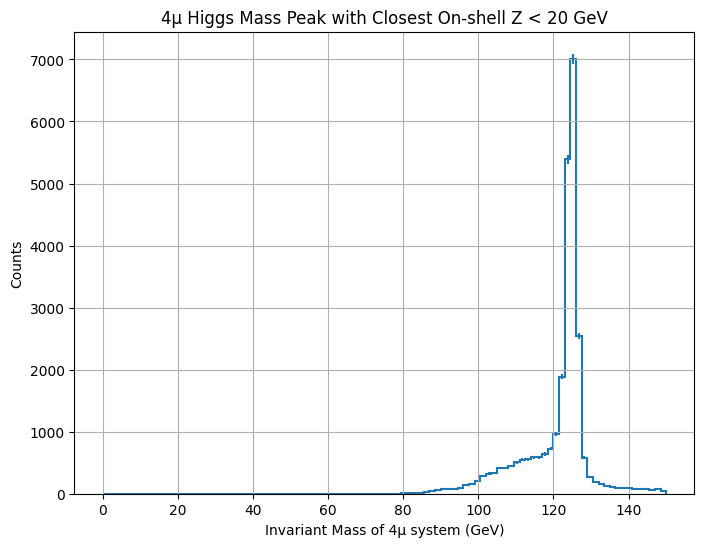

In [7]:
import awkward as ak
import hist
import matplotlib.pyplot as plt

# Hardcoded Z boson mass in GeV
ZMASS = 91.1876

# Step 1: Make pairs of muons of the same charge
muplus1, muplus2 = ak.unzip(ak.combinations(muons_plus, 2))
muminus1, muminus2 = ak.unzip(ak.combinations(muons_minus, 2))

# Step 2: Cartesian product of opposite-sign pairs for all possible Z bosons
muplus11, muminus11 = ak.unzip(ak.cartesian((muplus1, muminus1)))
muplus12, muminus12 = ak.unzip(ak.cartesian((muplus1, muminus2)))
muplus21, muminus21 = ak.unzip(ak.cartesian((muplus2, muminus1)))
muplus22, muminus22 = ak.unzip(ak.cartesian((muplus2, muminus2)))

# Step 3: Calculate distances from Z mass for all combinations
dist11 = abs((muplus11 + muminus11).mass - ZMASS)
dist12 = abs((muplus12 + muminus12).mass - ZMASS)
dist21 = abs((muplus21 + muminus21).mass - ZMASS)
dist22 = abs((muplus22 + muminus22).mass - ZMASS)

# Step 4: Identify which pair is closest to being on-shell
onshell_11 = (dist11 < dist12) & (dist11 < dist21) & (dist11 < dist22)
onshell_12 = (dist12 < dist11) & (dist12 < dist21) & (dist12 < dist22)
onshell_21 = (dist21 < dist11) & (dist21 < dist12) & (dist21 < dist22)
onshell_22 = (dist22 < dist11) & (dist22 < dist12) & (dist22 < dist21)

# Step 5: Require the closest to on-shell pair to be within 20 GeV of Z mass
cut_11 = onshell_11 & (dist11 < 20)
cut_12 = onshell_12 & (dist12 < 20)
cut_21 = onshell_21 & (dist21 < 20)
cut_22 = onshell_22 & (dist22 < 20)

# Step 6: Sum four-momenta for Higgs candidates depending on which pairs are selected
higgs_candidates_11_22 = (muplus11 + muminus11 + muplus22 + muminus22)[cut_11 | cut_22]
higgs_candidates_12_21 = (muplus12 + muminus12 + muplus21 + muminus21)[cut_12 | cut_21]

# Step 7: Create histogram and fill with the invariant mass of candidates
h = hist.Hist.new.Reg(100, 0, 150).Double()

h.fill(ak.ravel(higgs_candidates_11_22.mass))
h.fill(ak.ravel(higgs_candidates_12_21.mass))

# Step 8: Plot histogram
fig, ax = plt.subplots(figsize=(8,6))
h.plot(ax=ax)
ax.set_xlabel("Invariant Mass of 4μ system (GeV)")
ax.set_ylabel("Counts")
ax.set_title("4μ Higgs Mass Peak with Closest On-shell Z < 20 GeV")
ax.grid(True)
plt.show()
